In [2]:
%pip install numpy pandas matplotlib seaborn scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 66.6 kB/s eta 0:00:0000:0200:07m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 54.0 kB/s eta 0:00:0000:0500:13
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 1.1 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 2.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 121.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.7/20.7 MB 1.1 MB/s eta 0:00:0000:0100:010m

[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# loading libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

Let's  have a look in the layoffs in the tech world in 2024 in comparison of the years before.

First step loading the data

In [ ]:
data = pd.read_csv("/TechLayoffsTracker_Q22025.csv", delimiter=";")

# print(data.head)

print(data.columns)

Index(['Nr', 'Company', 'Location_HQ', 'Region', 'USState', 'Country',
       'Continent', 'Laid_Off', 'Date_layoffs', 'Percentage',
       'Company_Size_before_Layoffs', 'Company_Size_after_layoffs', 'Industry',
       'Stage', 'Money_Raised_in__mil', 'Year', 'latitude', 'longitude'],
      dtype='object')


In [20]:
summary = pd.DataFrame({
    'Non-NA Count': data.count(),
    'NA Count': data.isna().sum()
})
print(summary)


                             Non-NA Count  NA Count
Nr                                   2248         0
Company                              2248         0
Location_HQ                          2248         0
Region                               2248         0
USState                              2248         0
Country                              2248         0
Continent                            2248         0
Laid_Off                             1930       318
Date_layoffs                         2248         0
Percentage                           1908       340
Company_Size_before_Layoffs          1740       508
Company_Size_after_layoffs           1822       426
Industry                             2248         0
Stage                                2248         0
Money_Raised_in__mil                 2048       200
Year                                 2248         0
latitude                             2248         0
longitude                            2248         0


In [21]:
# Drop rows with NaN in 'Laid_Off' column
data_cleaned = data.dropna(subset=['Laid_Off'])

# Verify the cleaned data
print(data_cleaned.shape)  # Check rows and columns

# Count non-NA values in the cleaned data
non_na_counts = data_cleaned.count()
print(non_na_counts)


(1930, 18)
Nr                             1930
Company                        1930
Location_HQ                    1930
Region                         1930
USState                        1930
Country                        1930
Continent                      1930
Laid_Off                       1930
Date_layoffs                   1930
Percentage                     1727
Company_Size_before_Layoffs    1727
Company_Size_after_layoffs     1727
Industry                       1930
Stage                          1930
Money_Raised_in__mil           1797
Year                           1930
latitude                       1930
longitude                      1930
dtype: int64


In [22]:
sum_laid_off = data_cleaned['Laid_Off'].sum()
print(sum_laid_off)

# Group by 'Year' and sum 'Laid_Off'
sum_laid_off_per_year = data_cleaned.groupby('Year')['Laid_Off'].sum()
print(sum_laid_off_per_year)

619374.0
Year
2020     61529.0
2021      6790.0
2022    127577.0
2023    176946.0
2024    173522.0
2025     73010.0
Name: Laid_Off, dtype: float64


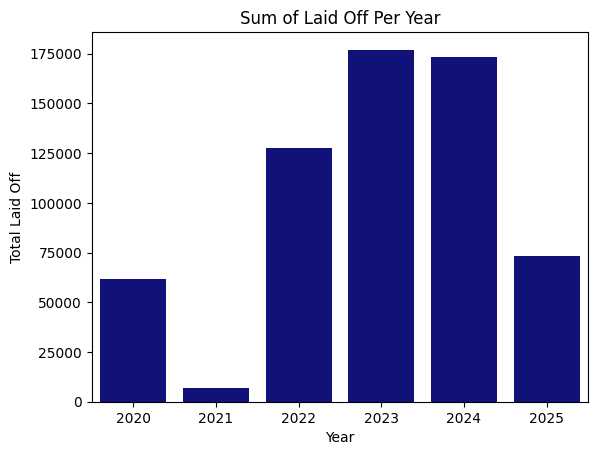

In [23]:
# Group by 'Year' and sum 'Laid_Off'
sum_laid_off_per_year = data_cleaned.groupby('Year')['Laid_Off'].sum()

# Create a bar chart using Seaborn
sns.barplot(x=sum_laid_off_per_year.index, y=sum_laid_off_per_year.values, color='darkblue')

# Add titles and labels
plt.title('Sum of Laid Off Per Year')
plt.xlabel('Year')
plt.ylabel('Total Laid Off')

# Show the plot
plt.show()

Layoffs in tech were in 2024 still high with 173.522, but not as high as in 2023.

In [24]:
# Group by 'Year' and 'Country' and sum 'Laid_Off'
sum_laid_off_per_year_country = data_cleaned.groupby(['Year', 'Country'])['Laid_Off'].sum().reset_index()

print(sum_laid_off_per_year_country)

     Year         Country  Laid_Off
0    2020       Australia      96.0
1    2020          Brazil    1227.0
2    2020          Canada     982.0
3    2020         Estonia      63.0
4    2020         Germany     331.0
..    ...             ...       ...
112  2025        Portugal      66.0
113  2025          Sweden    2800.0
114  2025     Switzerland     106.0
115  2025             USA   62751.0
116  2025  United Kingdom     440.0

[117 rows x 3 columns]


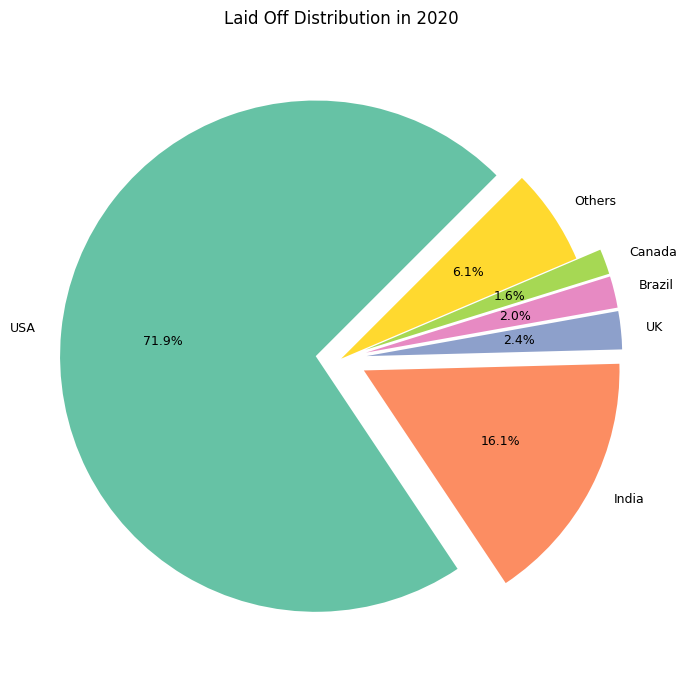

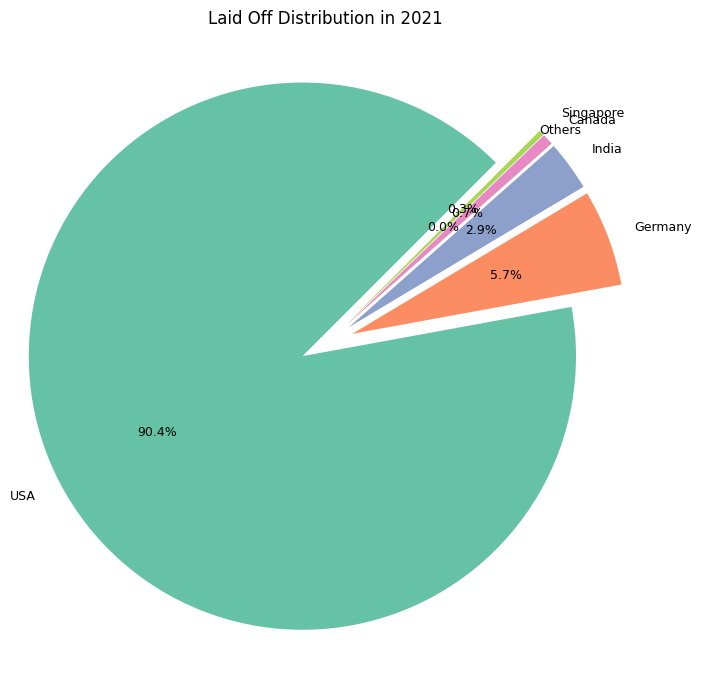

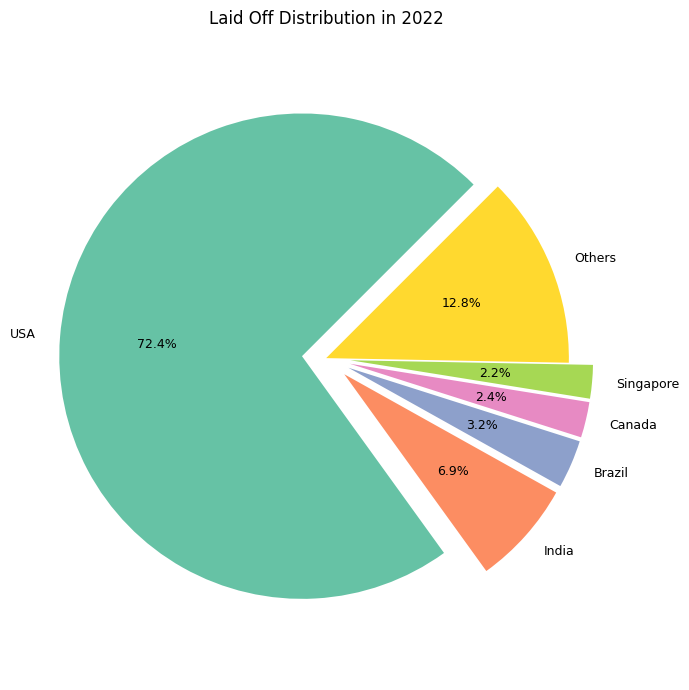

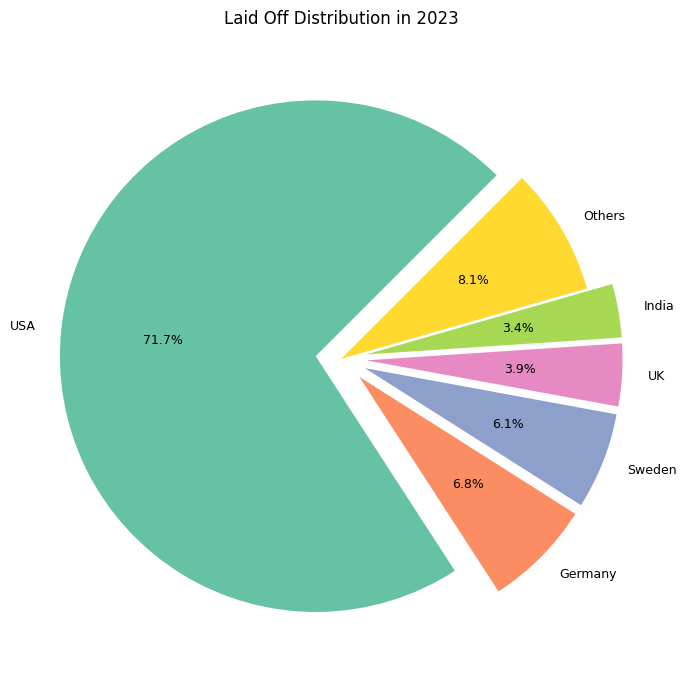

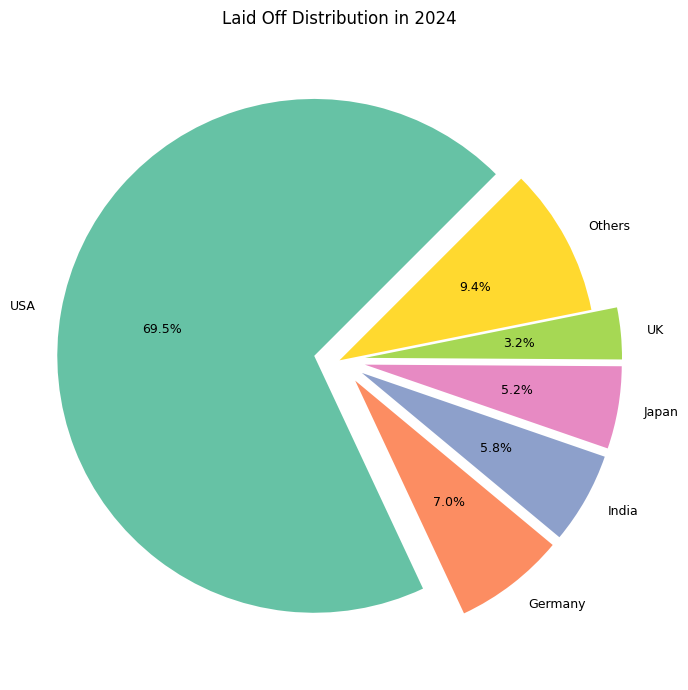

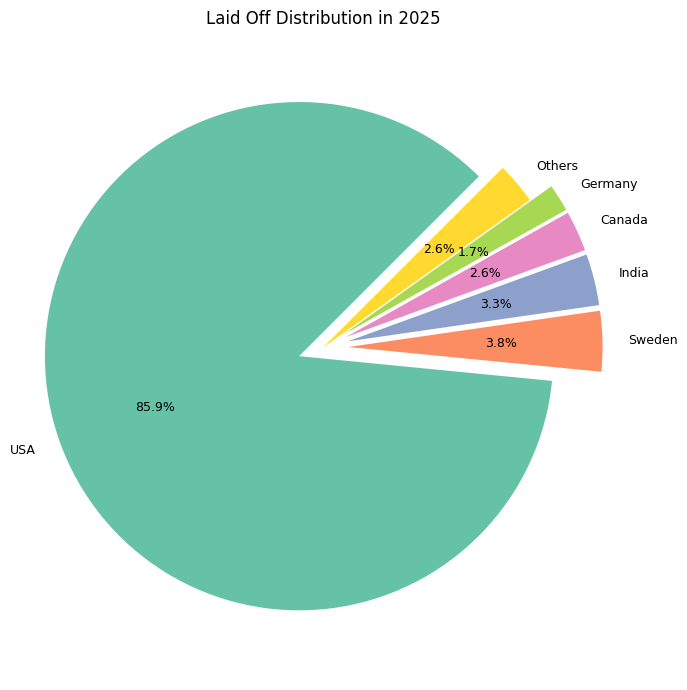

In [25]:
# Group by 'Year' and 'Country' and sum 'Laid_Off'
sum_laid_off_per_year_country = data_cleaned.groupby(['Year', 'Country'])['Laid_Off'].sum().reset_index()

# Get unique years
years = sum_laid_off_per_year_country['Year'].unique()

# Create a pie chart for each year
for year in years:
    # Filter data for the specific year
    year_data = sum_laid_off_per_year_country[sum_laid_off_per_year_country['Year'] == year]
    
    # Sort the data by 'Laid_Off' and get top 5 countries
    top_countries = year_data.nlargest(5, 'Laid_Off')
    
    # Get the remaining countries and sum their 'Laid_Off' values into "Others"
    others_sum = year_data[~year_data['Country'].isin(top_countries['Country'])]['Laid_Off'].sum()
    others = pd.DataFrame({'Country': ['Others'], 'Laid_Off': [others_sum]})
    
    # Combine top countries with "Others"
    final_data = pd.concat([top_countries, others])
    
    # Use Seaborn 'Set1' color palette
    colors = sns.color_palette('Set2', len(final_data))
    
    # Define 'explode' to slightly separate the largest slices (e.g., the top 5 countries)
    explode = [0.1 if country != 'Others' else 0 for country in final_data['Country']]

    # Plot the pie chart
    plt.figure(figsize=(7, 7))
    wedges, texts, autotexts = plt.pie(final_data['Laid_Off'], labels=final_data['Country'], autopct='%1.1f%%', 
                                       startangle=45, colors=colors, explode=explode, labeldistance=1.1)

    # Adjust label font size
    for text in texts + autotexts:
        text.set_fontsize(9)

    plt.title(f'Laid Off Distribution in {year}')
    plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
    
    # Ensure the layout is adjusted so labels don't overlap
    plt.tight_layout()
    plt.show()